In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import itertools
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv('./Car_sales.csv')
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
data.rename(columns={'__year_resale_value':'Year_resale_value'},inplace=True)

In [5]:
data.head()

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [6]:
data.shape

(157, 16)

In [7]:
data.isnull().mean()*100

Manufacturer           0.000000
Model                  0.000000
Sales_in_thousands     0.000000
Year_resale_value     22.929936
Vehicle_type           0.000000
Price_in_thousands     1.273885
Engine_size            0.636943
Horsepower             0.636943
Wheelbase              0.636943
Width                  0.636943
Length                 0.636943
Curb_weight            1.273885
Fuel_capacity          0.636943
Fuel_efficiency        1.910828
Latest_Launch          0.000000
Power_perf_factor      1.273885
dtype: float64

In [8]:
data.fillna(data.mean(),inplace=True)

In [9]:
data.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Year_resale_value     0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [10]:
palette = itertools.cycle(sns.color_palette())

### Univariate analysis

In [11]:
### Histogram
data.head()

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


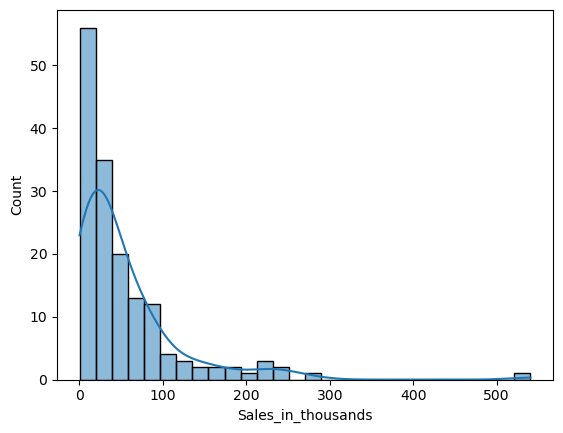

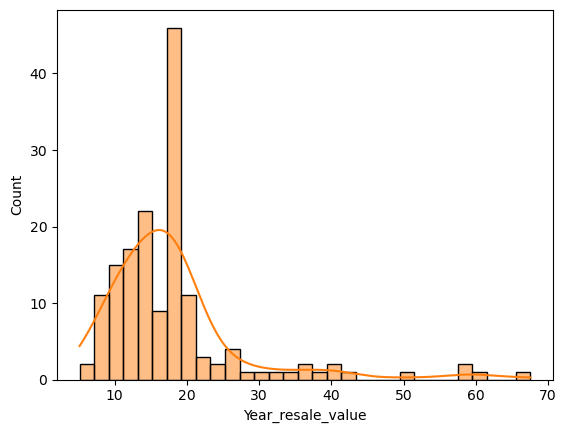

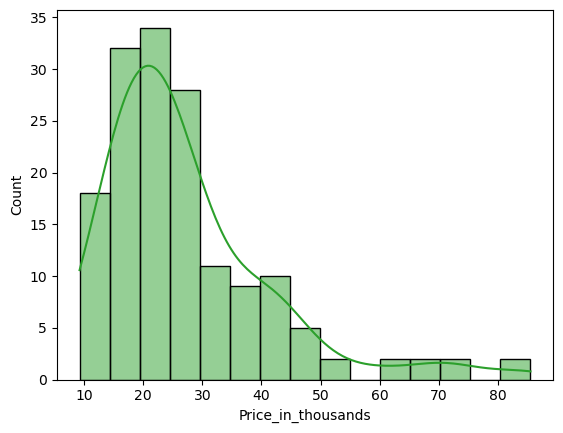

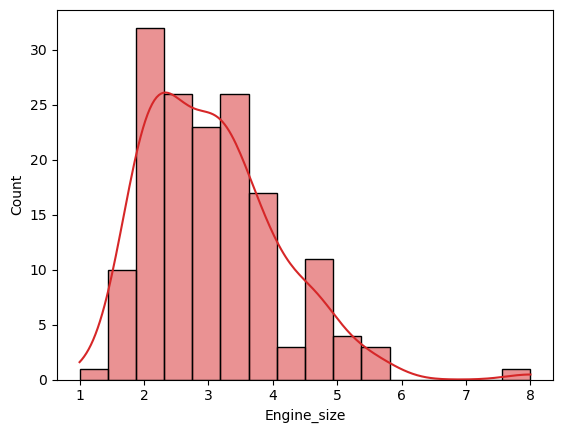

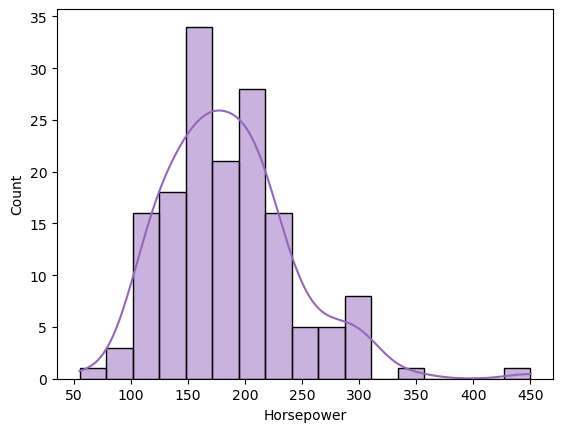

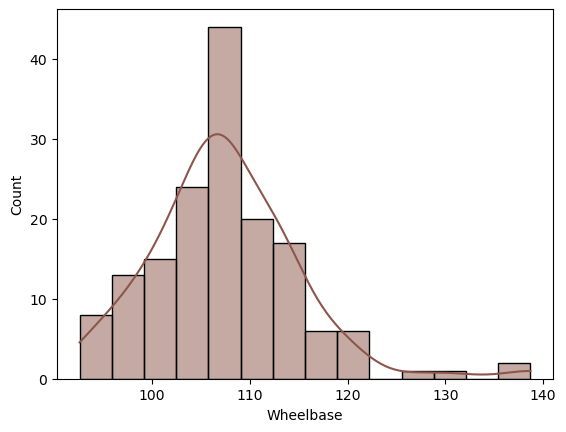

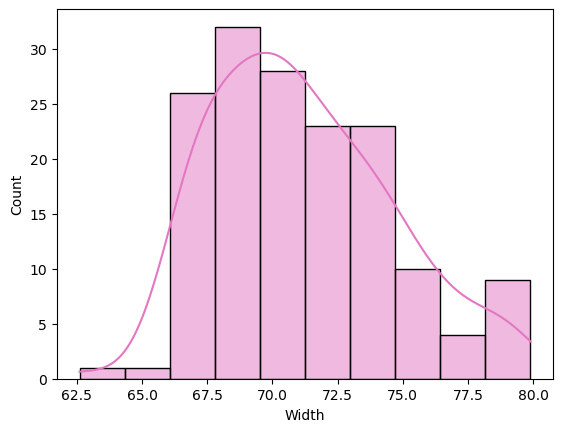

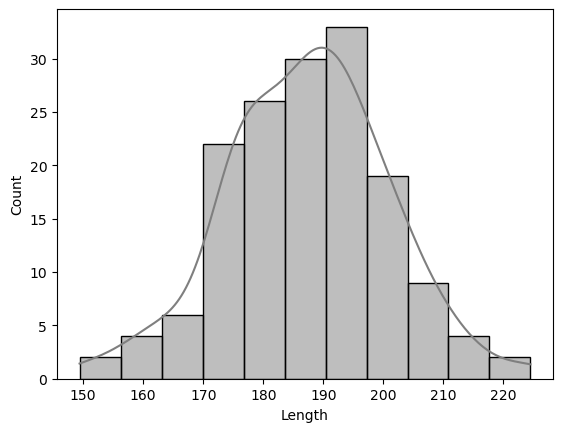

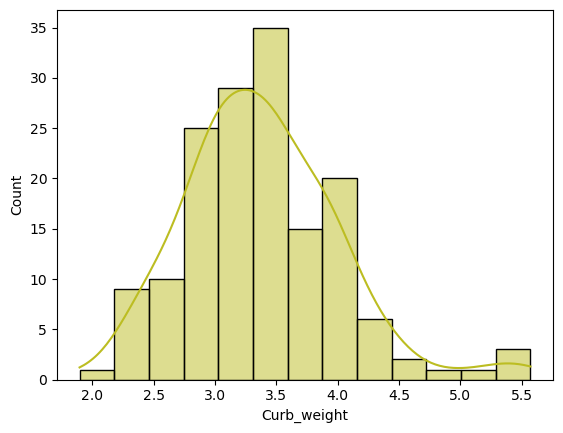

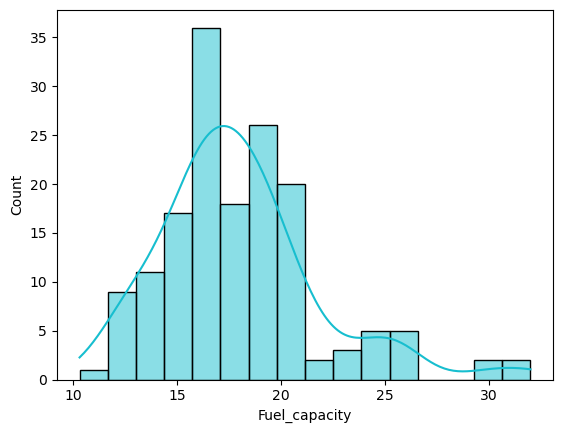

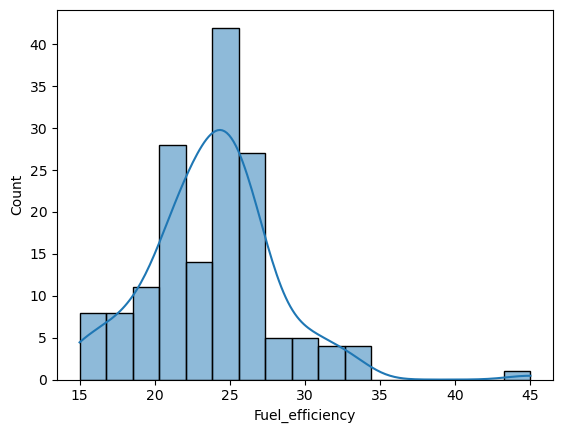

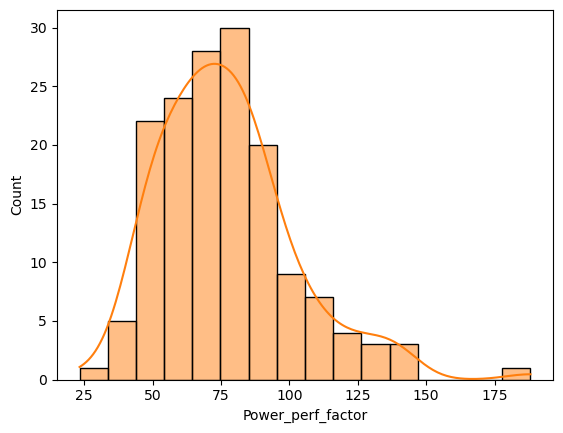

In [12]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.histplot(data=data,x=data[i],kde=True,color=next(palette))
        plt.show()

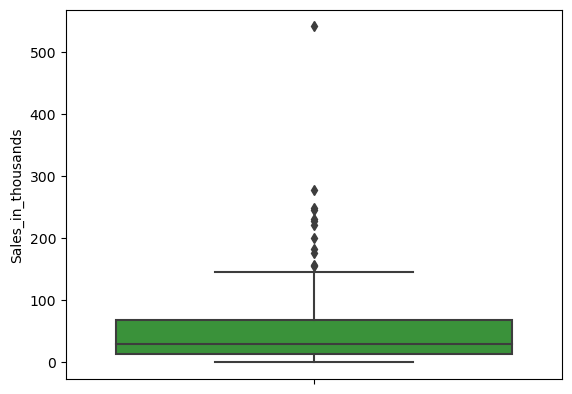

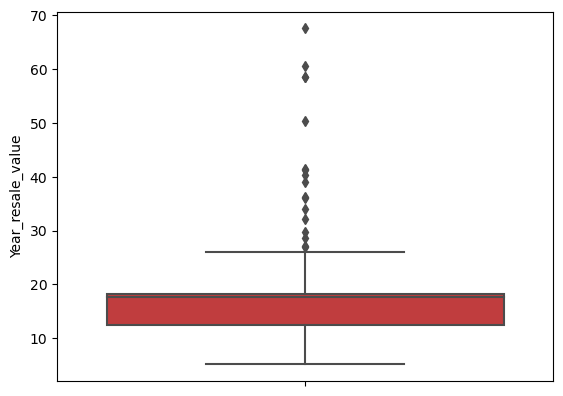

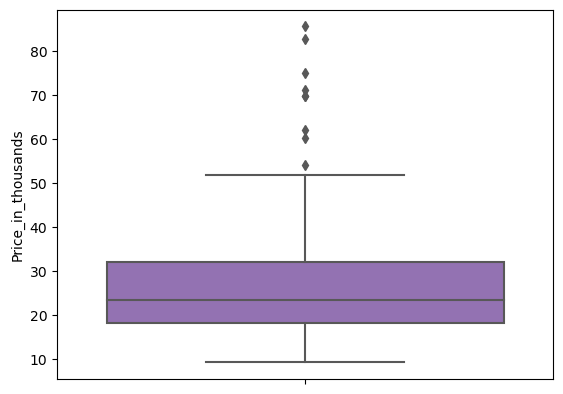

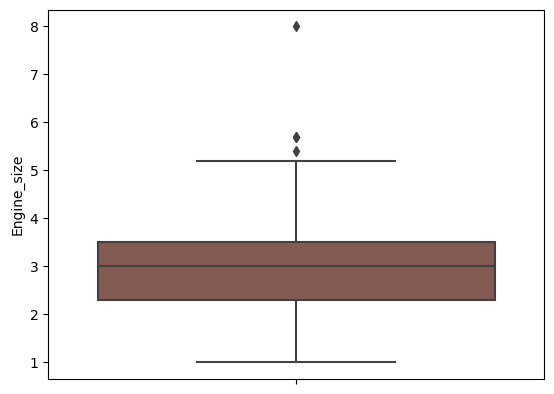

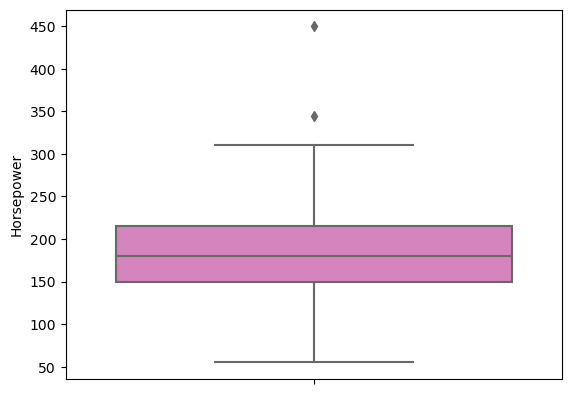

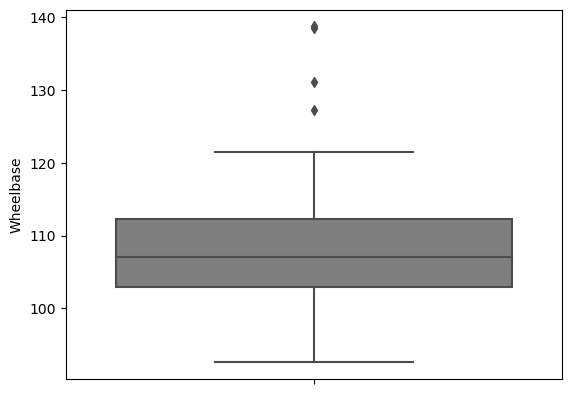

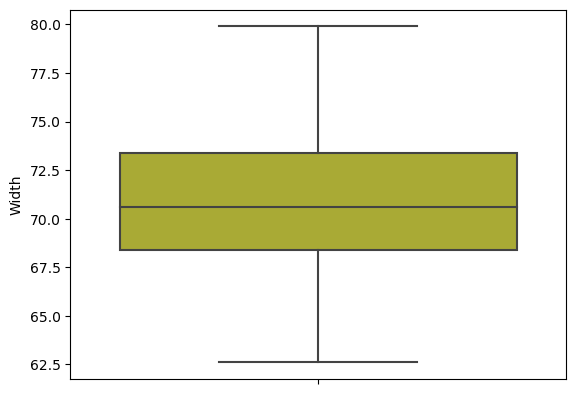

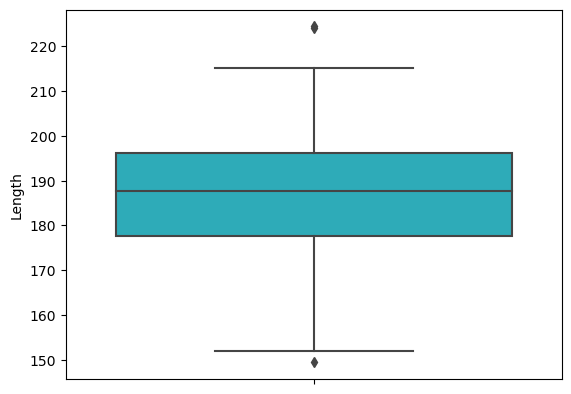

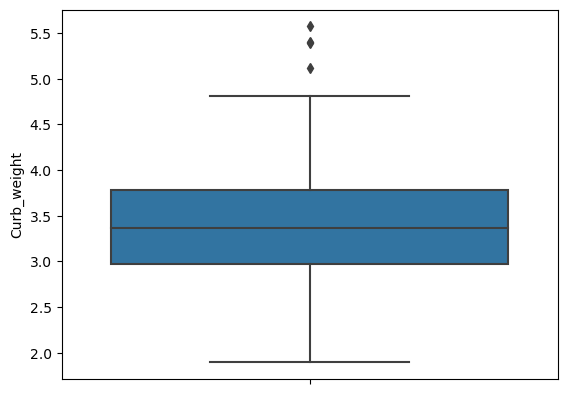

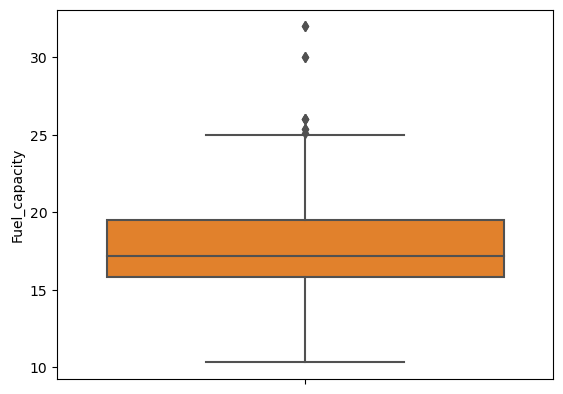

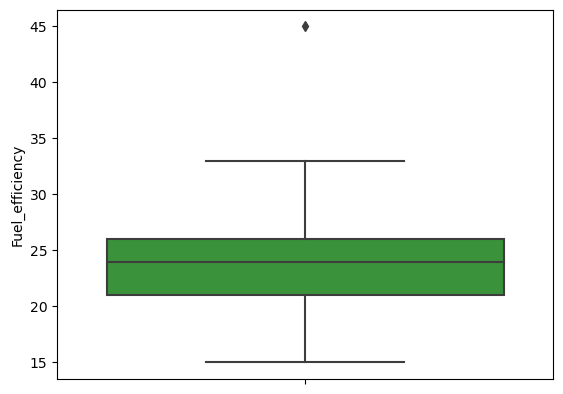

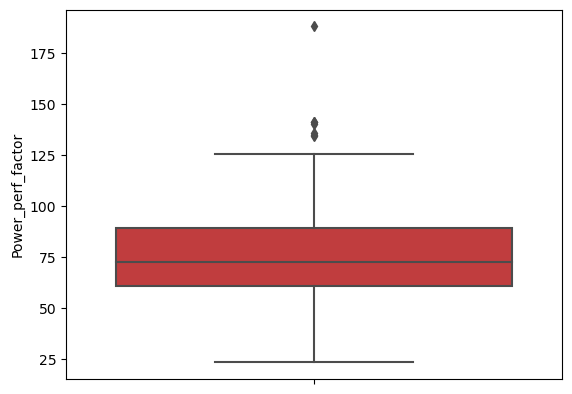

In [13]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(data=data,y=data[i],color=next(palette))
        plt.show()

In [14]:
data.head()

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [15]:
le = LabelEncoder()

In [16]:
data['Vehicle_type'] = le.fit_transform(data['Vehicle_type'])

In [17]:
data.head()

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,1,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,1,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,1,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725,1,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,1,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [18]:
data.corr()

,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.266436,-0.242183,-0.304413,0.019983,-0.197756,0.358179,0.140918,0.254979,0.008620,0.086540,-0.016747,-0.223017
Year_resale_value,-0.266436,1.000000,0.077119,0.822395,0.468781,0.696888,-0.047803,0.159580,0.023867,0.297130,0.275026,-0.358137,0.743783
Vehicle_type,-0.242183,0.077119,1.000000,0.043695,-0.256543,-0.004646,-0.384474,-0.243941,-0.134027,-0.517434,-0.592026,0.568540,0.001036
Price_in_thousands,-0.304413,0.822395,0.043695,1.000000,0.626839,0.838450,0.110511,0.329109,0.156874,0.523753,0.423230,-0.491489,0.897945
Engine_size,0.019983,0.468781,-0.256543,0.626839,1.000000,0.837360,0.472130,0.690398,0.541424,0.754668,0.663022,-0.733920,0.818481
Horsepower,-0.197756,0.696888,-0.004646,0.838450,0.837360,1.000000,0.286308,0.539158,0.393364,0.605226,0.499907,-0.610648,0.991464
Wheelbase,0.358179,-0.047803,-0.384474,0.110511,0.472130,0.286308,1.000000,0.683135,0.839639,0.650211,0.654044,-0.497023,0.258847
Width,0.140918,0.159580,-0.243941,0.329109,0.690398,0.539158,0.683135,1.000000,0.710435,0.718010,0.656302,-0.599465,0.511982
Length,0.254979,0.023867,-0.134027,0.156874,0.541424,0.393364,0.839639,0.710435,1.000000,0.625055,0.563540,-0.443993,0.353956
Curb_weight,0.008620,0.297130,-0.517434,0.523753,0.754668,0.605226,0.650211,0.718010,0.625055,1.000000,0.863912,-0.817784,0.607312


### Outlier Treatment - IQR Method

In [23]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [24]:
UL,LL = outlier_limit(data.Price_in_thousands)
data['Price_in_thousands'] = np.where((data.Price_in_thousands>UL) | (data.Price_in_thousands<LL),np.nan,data.Price_in_thousands)

In [25]:
data.dropna(inplace=True)

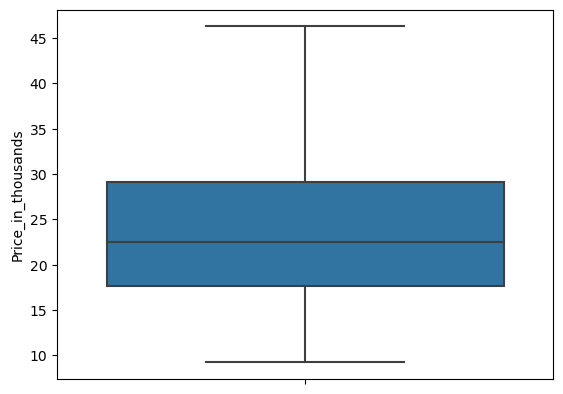

In [26]:
sns.boxplot(y=data.Price_in_thousands)
plt.show()

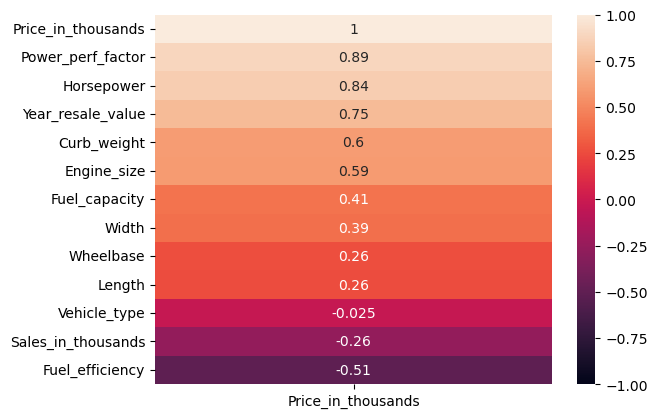

In [27]:
sns.heatmap(data.corr()[["Price_in_thousands"]].sort_values(by="Price_in_thousands",ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

In [28]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'Year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [29]:
x=data[['Power_perf_factor','Engine_size','Curb_weight','Horsepower']].values

In [30]:
y=data[['Price_in_thousands']].values

### Feature scaling

In [31]:
rs = RobustScaler()

In [32]:
x = rs.fit_transform(x)

### Model building

In [33]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "LinearSVR":LinearSVR()
    }

In [34]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("Cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg =np.mean(rmse)
    print("Average rsme :",rmse_avg)
    print("*"*100)

Cross validation model : LinearRegression
Average rsme : 2.320960515593101
****************************************************************************************************
Cross validation model : Ridge
Average rsme : 3.333744378925517
****************************************************************************************************
Cross validation model : RandomForestRegressor
Average rsme : 3.8525853411613995
****************************************************************************************************
Cross validation model : AdaBoostRegressor
Average rsme : 3.865639455051023
****************************************************************************************************
Cross validation model : GradientBoostingRegressor
Average rsme : 3.5943234574865572
****************************************************************************************************
Cross validation model : DecisionTreeRegressor
Average rsme : 5.052762484683566
**********************************

#### LinearRegression showing best results

In [295]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=90)

In [296]:
LR_model = LinearRegression()

In [297]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [298]:
y_pred = LR_model.predict(x_test)

In [299]:
r2_score(y_test,y_pred)

0.9793973734776129

In [300]:
LR_model.score(x_test,y_test)

0.9793973734776129

In [301]:
LR_model.score(x_train,y_train)

0.923220042412299

In [302]:
mean_absolute_error(y_test,y_pred)

0.9043037124286525

In [303]:
mean_squared_error(y_test,y_pred)

1.415047500415946

In [304]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.1895576910835162

In [305]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'],dtype=float)
Output.head()

,Actual,Prediction
0,16.980,16.280680
1,31.010,31.176394
2,39.665,40.025911
3,14.900,14.420686
4,12.070,11.794088


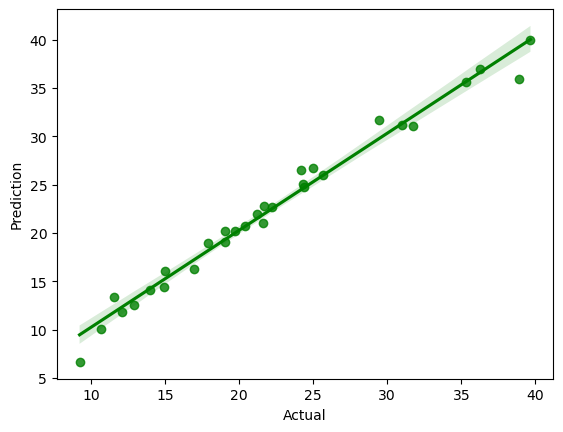

In [306]:
sns.regplot(data=Output,x='Actual',y='Prediction',color='green')
plt.show()